<center> <h1>Workshop: A/B Testing</h1> </center> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. Setup

In this file, we will analyze data from an A/B test designed to study advertising effectiveness.

#### Download data/script files and launch Jupyter Notebook
1.	Create a new file folder on your computer
2.	Download the file “AB_test_advertising.csv” from Canvas to your folder
3.	Make sure the current notebook is in the same folder


### 2. Descriptive Analysis


#### 2.1 First look at the data
Load the data (use the pd.read_csv command) and use AB_test as the name for the data frame. Eyeball the variables in the data frame by using the data_frame.head() command.

In [2]:
AB_test = pd.read_csv('AB_test_advertising.csv')
AB_test.head()

,user_id,treatment,revenue,gender,stateID,age,browser,facebook_login,revenuePrevYear
0,1,1,0.0,Male,3,22,Other,0,4636.9302
1,2,0,0.0,Male,38,22,Explorer,0,6504.2603
2,3,0,0.0,Male,21,22,Chrome,0,5164.5303
3,4,0,0.0,Male,3,23,Other,0,5366.8101
4,5,1,0.0,Male,24,23,Chrome,0,5795.8301


**Q:** Add code to the chunk below to summarize the data frame using the command frame_name.describe(). Make sure you understand what the different variables refer to and which values they take on. How many observations are there? What is the unit of observation?

In [3]:
AB_test.describe()

,user_id,treatment,revenue,stateID,age,facebook_login,revenuePrevYear
count,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,500000.500000,0.50022,10.169842,25.512115,22.011306,0.240081,5.413937e+03
std,288675.278933,0.50000,276.990538,14.433331,0.725652,0.427133,3.472124e+03
min,1.000000,0.00000,0.000000,1.000000,21.000000,0.000000,0.000000e+00
25%,250000.750000,0.00000,0.000000,13.000000,22.000000,0.000000,4.636470e+03
50%,500000.500000,1.00000,0.000000,25.000000,22.000000,0.000000,5.319760e+03
75%,750000.250000,1.00000,0.000000,38.000000,23.000000,0.000000,6.008300e+03
max,1000000.000000,1.00000,140464.830000,50.000000,81.000000,1.000000,1.692130e+06


**Answer:** We have 1,000,000 observations. The unit of observation is an individual user.

#### 2.2 A closer look at the revenue variable

The summary command includes descriptive statistics for the revenue variable. Explore the variation in this variable further using a histogram.

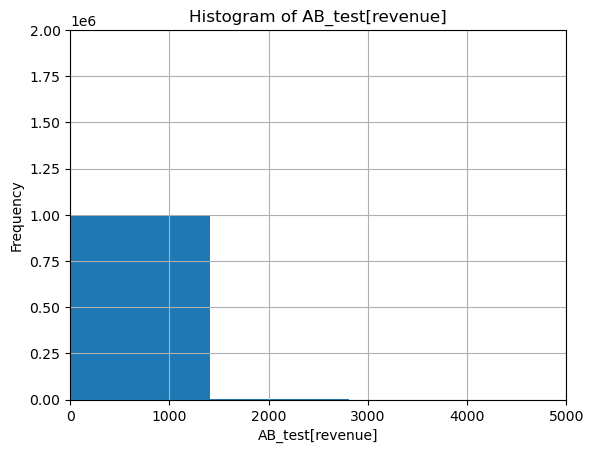

In [18]:
AB_test.hist(column='revenue',bins=100)
plt.title('Histogram of AB_test[revenue]') 
plt.xlabel('AB_test[revenue]') 
plt.ylabel('Frequency')
plt.xlim(0,5000)
plt.ylim(0,2000000)
plt.show()

#set x axis length 0-100 range


This histogram is hard to read because the distribution of revenue is very skewed. We thus focus on values of revenue above 0 and below 100. We can do this by filtering the data frame by using conditional statements.

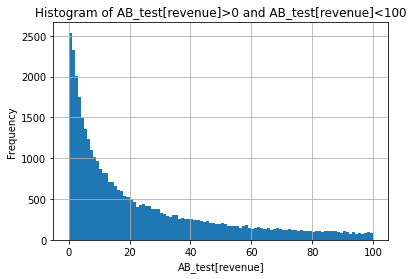

In [6]:
AB_test[(AB_test['revenue'] > 0) & (AB_test['revenue'] < 100)].hist(column='revenue',bins=100)
plt.title('Histogram of AB_test[revenue]>0 and AB_test[revenue]<100') 
plt.xlabel('AB_test[revenue]') 
plt.ylabel('Frequency')
plt.show()

Next, generate a variable that is equal to one if revenue is positive and zero when no purchase occurred. 

**Q:** Add code to the chunk below to compute the proportion of consumers that made a purchase. What is this proportion?

In [20]:
AB_test['purchase_dummy'] = np.where(AB_test['revenue']>0, 1, 0)
mean = np.mean(AB_test['purchase_dummy'])
mean

0.051486

**Answer:** {{100*mean}}% of the individuals made a purchase.

### 3. Checking randomization
You want to verify that the A/B test was actually implemented correctly. You know that if randomization is done correctly, the treatment variable should be uncorrelated with consumer demographics. Implement a regression that tests whether gender, age, and facebook_login are correlated with treatment.

**Q:** Can you reject the null hypothesis that these three variables do not predict treatment (try to test for the correlation / influence of all three variables in one single regression)?

In [21]:
random_check_reg = smf.ols(formula = 'treatment ~ gender + age + facebook_login', data = AB_test)
result = random_check_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              treatment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4931
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.687
Time:                        00:06:17   Log-Likelihood:            -7.2579e+05
No. Observations:             1000000   AIC:                         1.452e+06
Df Residuals:                  999996   BIC:                         1.452e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5040      0.015     32.

**Answer:** We cannot reject the null hypothesis that these control variables do not predict treatment (this is the F-statistic, with a p-value of 0.687, which implies no rejection). The demographic variables are all insignificant. This should be the case if random assignment was done correctly.

### 4. Simple A/B test

#### 4.1 Revenue regression

**Q:** Fill in the chunk below with code that regresses revenue on treatment in order to test whether treatment (showing an ad) has a significant effect on revenue generated. Interpret the intercept and the treatment coefficients. Is the difference in revenue between treatment and control group statistically significant?


In [22]:
AB_simple_revenue_reg  = smf.ols(formula = 'revenue ~ treatment', data = AB_test)
result = AB_simple_revenue_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.349
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.125
Time:                        00:08:18   Log-Likelihood:            -7.0429e+06
No. Observations:             1000000   AIC:                         1.409e+07
Df Residuals:                  999998   BIC:                         1.409e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7451      0.392     24.872      0.0

**Answer:** The intercept represents the average revenue value for the control group, which is 9.74 dollars. The treatment coefficient represents the difference between treatment and control group. The difference is 0.84 dollars but it is not statistically significant.

#### 4.2 Purchase dummy regression

**Q:** Fill in the chunk below with code that, instead of revenue, uses the purchase_dummy as the outcome variable and regresses it on treatment. Interpret the intercept value and the treatment coefficient in this regression. Is the difference in purchase probabilities between treatment and control group statistically significant? Compare the results from this regression to the previous regression. Why does the level of precision differ?

In [23]:
AB_simple_revenue_reg  = smf.ols(formula = 'purchase_dummy ~ treatment', data = AB_test)
result = AB_simple_revenue_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         purchase_dummy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     41.60
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           1.12e-10
Time:                        00:09:02   Log-Likelihood:                 90734.
No. Observations:             1000000   AIC:                        -1.815e+05
Df Residuals:                  999998   BIC:                        -1.814e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0501      0.000    160.148      0.0

**Answer:** We find a positive and highly significant effect in this regression. This is a linear probability model (0-1 Y-variable), therefore the intercept represents the purchase probability in the control group, which is 5%. The treatment coefficient represents the increase in purchase probability in the treatment group relative to the control group, which is 0.2% and is statistically significant. The regression residual is smaller in this regression (N and Var(X) are the same) and this leads to higher precision:

$$
Var(\hat{\beta}_1) = \frac{1}{N}\frac{Var(e)}{Var(X)}.
$$

This occurs because the purchase dummy only takes on two values (0 and 1), whereas revenue is highly variable as we say earlier.

### 5. A/B test with control variables

We now regress revenue on treatment as well as ALL demographic variables.

In [24]:
#'revenue ~ treatment+ gender + stateID + age + browser + facebook_login + revenuePrevYear'
AB_test.stateID = AB_test.stateID.astype("category")
AB_controls_reg = smf.ols(formula = 'revenue ~ treatment + gender + stateID + age + browser + facebook_login + revenuePrevYear', data=AB_test)
result = AB_controls_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.984e+05
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:11:36   Log-Likelihood:            -5.7958e+06
No. Observations:             1000000   AIC:                         1.159e+07
Df Residuals:                  999943   BIC:                         1.159e+07
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -490.1183    

**Q:** Compare the coefficient on treatment from this regression with the treatment coefficient from the simple A/B-test regression without controls. Did you expect this difference / lack of difference in the coefficients?

**Answer:** The treatment coefficient is similar to the regression without controls (0.87 dollars here). This is what we would expect if treatment is randomly assigned. Because treatment is not correlated with any of the controls (as we checked earlier), including control does not alter the treatment coefficient.

### 6. Optimal sample size calculation

For this question, assume that an ad effect of at least 0.5 dollars is profitable. Taking the estimate of the ad effect from the univariate regression in section 4.1 as a benchmark, how large would the sample size have to be so that 0.5 is outside the 97.5 percent one-sided confidence interval for the true ad effect? For the value of $s^2$ that you need to pick in this computation, consider both:

1. the variance of Y;
2. the variance of the residual from a regression of Y on all control variables (except the treatment).

**Q:** Add code in the chunk below that computes the variance of the revenue variable.

In [29]:
var_revenue = np.var(AB_test.revenue)
var_revenue

76723.68126163518

The variance of the revenue is {{var_revenue}}.

Compute the variance of the residual from a regression of $Y$ on all controls.

In [28]:
AB_controls_reg2 = smf.ols(formula = 'revenue ~ gender + stateID + age + browser + facebook_login + revenuePrevYear', data=AB_test)
result = AB_controls_reg2.fit()
AB_test['AB_controls_residual2'] = result.resid
var_residuals = np.var(AB_test.AB_controls_residual2 )
var_residuals

6333.80281752344

**Q:** What is the variance of the residuals? Compare the two estimates of $s^2$ and explain why one is larger than the other.

**Answer:** The new estimate is {{var_residuals}}, which is much smaller than the variance of revenue. Note that in every regression $V(Y)\ge V(e)=s^2$.

**Q:** Now compute the optimal sample sizes for both estimates of $s^2$. 

**Answer:** The estimated effect of the ad on profits was 0.85 dollars. We can get rejection by choosing a standard error of (0.85 - 0.5)/2 = 0.175. Determining sample size using the variance of Y for $s^2$ (which you can think of as an upper bound for $s^2$, because in every regression $V(Y)\ge V(e)=s^2$) gives:

$$N>\frac{s^2}{p(1-p)}\cdot \frac{1}{SE^2}= \frac{76723}{0.25}\cdot \frac{1}{0.175^2} =10,020,963$$

Using the variance of the residuals from the regression of Y on controls for $s^2$, the optimal sample size becomes

$$N>\frac{s^2}{p(1-p)}\cdot \frac{1}{SE^2}= \frac{6333}{0.25}\cdot \frac{1}{0.175^2} = 827,167$$


This is much smaller because of the smaller value of $s^2$ we obtained from the multivariate regression.